Intro to Scalable Computing with Dask in Python

https://www.youtube.com/watch?v=FwhtHOKU8Jk

Parrallelize code with dask.delayed

In [1]:
import time

def inc(x):
    time.sleep(1)
    return x+1

def add(x,y):
    time.sleep(1)
    return x+y

In [2]:
a = 1
b = 2
c = 3

In [3]:
%%time
ai = inc(a)
bi = inc(b)
ci = inc(c)

ab = add(ai,bi)

abc = add(ab,ci)
abc

CPU times: user 1.89 ms, sys: 2.34 ms, total: 4.22 ms
Wall time: 5.02 s


9

In [4]:
from dask import delayed
inc_delayed = delayed(inc)

inc_delayed

Delayed('inc-3de8b95d-2345-4735-967f-105ddbc2e6bc')

In [5]:
ai = delayed(inc)(a)
ai

Delayed('inc-79a462d3-c722-4cbe-bc41-f10c21196b9f')

In [6]:
ai = inc_delayed(a)

In [7]:
# to get thea result call compute()
ai.compute()

2

In [8]:
# rewrite with dask.delayed:
ai = delayed(inc)(a)
bi = delayed(inc)(b)
ci = delayed(inc)(c)

ab = delayed(add)(ai,bi)

abc = delayed(add)(ab,ci)
abc

Delayed('add-cb34325e-adbb-486f-b3d9-a7f6a202109f')

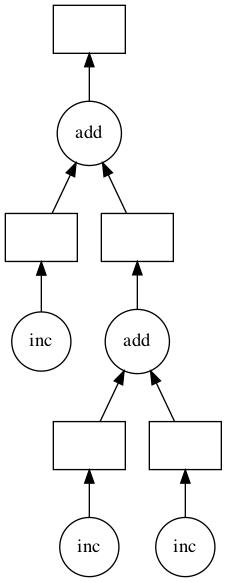

In [9]:
# visualize the delayed object abc (install graphviz)
abc.visualize()

In [10]:
%time abc.compute() # 3 s instead of 5 s

CPU times: user 4.69 ms, sys: 3.53 ms, total: 8.22 ms
Wall time: 3.03 s


9

In [11]:
# for loop example
import numpy as np

for i in range(10):
    x= np.random.randn(10000, 10000) # about 800MB for 100M 64bit-float numbers
    np.save("randarray_{}.npy".format(i),x)

In [12]:
%ls -l rand*.npy

-rw-r--r--+ 1 rmueller  staff  800000128 Apr  5 09:41 randarray_0.npy
-rw-r--r--+ 1 rmueller  staff  800000128 Apr  5 09:41 randarray_1.npy
-rw-r--r--+ 1 rmueller  staff  800000128 Apr  5 09:41 randarray_2.npy
-rw-r--r--+ 1 rmueller  staff  800000128 Apr  5 09:41 randarray_3.npy
-rw-r--r--+ 1 rmueller  staff  800000128 Apr  5 09:41 randarray_4.npy
-rw-r--r--+ 1 rmueller  staff  800000128 Apr  5 09:41 randarray_5.npy
-rw-r--r--+ 1 rmueller  staff  800000128 Apr  5 09:41 randarray_6.npy
-rw-r--r--+ 1 rmueller  staff  800000128 Apr  5 09:42 randarray_7.npy
-rw-r--r--+ 1 rmueller  staff  800000128 Apr  5 09:42 randarray_8.npy
-rw-r--r--+ 1 rmueller  staff  800000128 Apr  5 09:42 randarray_9.npy


In [13]:
%%time
from glob import glob

sums = []
for file in glob('rand*.npy'):
    x=np.load(file)
    sums.append(x.sum())
    
result = sum(sums)
result

CPU times: user 2.04 s, sys: 14.4 s, total: 16.4 s
Wall time: 26.8 s


-18029.377170455

In [14]:
%%time
from glob import glob

sums = []
for file in glob('rand*.npy'):
    x=delayed(np.load)(file)
    sums.append(x.sum())
    
result = delayed(sum)(sums)
result

CPU times: user 3.29 ms, sys: 70.4 ms, total: 73.7 ms
Wall time: 76.7 ms


Delayed('sum-a46927ad-ea38-4023-b112-2ba8d224e755')

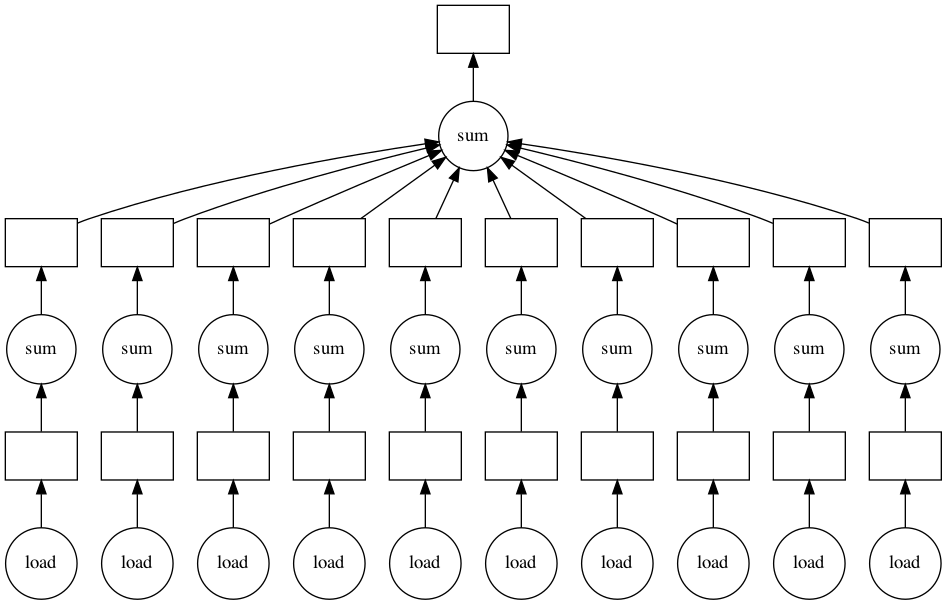

In [15]:
result.visualize()

In [16]:
%time result.compute()

CPU times: user 3.19 s, sys: 38.1 s, total: 41.3 s
Wall time: 8min 17s


-18029.377170455

In [17]:
import netCDF4 as nc
f=nc.Dataset('/results/SalishSea/nowcast-green.201812/01jan15/SalishSea_1h_20150101_20150101_ptrc_T.nc')
dset=f['nitrate']

FileNotFoundError: [Errno 2] No such file or directory: b'/results/SalishSea/nowcast-green.201812/01jan15/SalishSea_1h_20150101_20150101_ptrc_T.nc'

In [ ]:
%%time
sums = []

for i in range(0, 24,2):
    chunk=dset[i:i+2,:,:,:]
    sums.append(chunk.sum())
    
total = sum(sums)

print(total)

In [ ]:
import dask.array as da

x=da.from_array(dset, chunks=(2,40,898,398))
x

In [ ]:
x.sum()

In [ ]:
x.sum().visualize()

In [ ]:
x.sum().compute()

In [ ]:
%time x.sum().compute()

In [ ]:
# numpy array

In [ ]:
%%time
x = np.random.normal(10,0.1,size=(20000,20000)) # 400 million numbers total size about 3.2 gb
y=x.mean(axis=0)[::100]
y

In [ ]:
## dask
x = da.random.normal(10,.1,size=(20000,20000),chunks=(1000,1000))
y=x.mean(axis=0)[::100]

In [ ]:
x.

In [ ]:
%time y.compute()

https://docs.dask.org/en/latest/array.html